# Pulling data from the NHS BSA Open Data Portal (ODP) using R

The ODP https://opendata.nhsbsa.net/ has two programatic methods to access data from it...

* `datastore_search` e.g. https://opendata.nhsbsa.net/api/3/action/datastore_search?resource_id=EPD_201401&limit=5
* `datastore_search_sql` e.g. https://opendata.nhsbsa.net/api/3/action/datastore_search_sql?resource_id=EPD_201401&sql=SELECT%20*%20FROM%20`EPD_201401`%20LIMIT%205

The following code demonstrates the process using the SQL style query. It is a more flexible way to access any data and easy if you already know some SQL (if not don't worry - the code is there for you to follow).

In [1]:
# Define the url for the API call
base_endpoint <- "https://opendata.nhsbsa.net/api/3/action"
action_method <- "/datastore_search_sql?" # SQL

In [2]:
# Define the parameters for the SQL query
resource_name <- "EPD_202001"
pco_code <- "13T00" # Newcastle Gateshead CCG
bnf_chemical_substance <- "0407010H0" # Paracetamol

In [3]:
# Construct the SQL query
query <- paste0(
    "
    SELECT 
        * 
    FROM `", 
        resource_name, "` 
    WHERE 
        1=1 
    AND pco_code = '", pco_code, "' 
    AND bnf_chemical_substance = '", bnf_chemical_substance, "'"
)

In [4]:
# Send API call and grab the response as a json
response <- jsonlite::fromJSON(paste0(
    base_endpoint,
    action_method,
    "resource_id=",
    resource_name, 
    "&",
    "sql=",
    URLencode(query) # Encode spaces in the url
))

In [5]:
# Extract records in the response to a dataframe
result_df <- response$result$result$records

In [6]:
# View the first 6 rows of data
head(result_df)

,BNF_CODE,TOTAL_QUANTITY,POSTCODE,YEAR_MONTH,UNIDENTIFIED,PRACTICE_NAME,BNF_CHAPTER_PLUS_CODE,ACTUAL_COST,QUANTITY,REGIONAL_OFFICE_CODE,⋯,ADQUSAGE,PCO_CODE,REGIONAL_OFFICE_NAME,NIC,CHEMICAL_SUBSTANCE_BNF_DESCR,PRACTICE_CODE,PCO_NAME,AREA_TEAM_NAME,BNF_DESCRIPTION,ADDRESS_1
,<chr>,<dbl>,<chr>,<int>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0407010H0AAAMAM,28,NE4 6SS,202001,FALSE,MARIE CURIE HOSPICE,04: Central Nervous System,0.73537,28,Y54,⋯,4.66667,13T00,NORTH OF ENGLAND,0.67,Paracetamol,Y05648,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 500mg tablets,MARIE CURIE HOSPICE
2,0407010H0AAACAC,200,NE5 3AE,202001,FALSE,PONTELAND RD WIC,04: Central Nervous System,3.88041,200,Y54,⋯,3.33333,13T00,NORTH OF ENGLAND,4.16,Paracetamol,Y03375,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 250mg/5ml oral suspension,PONTELAND RD WIC
3,0407010H0AAACAC,100,NE5 3AE,202001,FALSE,PONTELAND RD WIC,04: Central Nervous System,1.94640,100,Y54,⋯,1.66667,13T00,NORTH OF ENGLAND,2.08,Paracetamol,Y03375,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 250mg/5ml oral suspension,PONTELAND RD WIC
4,0407010H0AAAIAI,100,NE1 4LP,202001,FALSE,NEWCASTLE GP IN A&E SERVICE,04: Central Nervous System,1.27466,100,Y54,⋯,0.80000,13T00,NORTH OF ENGLAND,1.25,Paracetamol,Y04832,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 120mg/5ml oral suspension paediatric,ACCIDENT & EMERGENCY DPT
5,0407010H0AAACAC,200,NE6 1SG,202001,FALSE,NEWCASTLE GP IN MOLINEUX WIC,04: Central Nervous System,3.89281,100,Y54,⋯,3.33333,13T00,NORTH OF ENGLAND,4.16,Paracetamol,Y05671,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 250mg/5ml oral suspension,MOLINEUX WALK-IN CENTRE
6,0407010H0AAAWAW,400,NE9 6SX,202001,FALSE,GATESHEAD EXTRA CARE,04: Central Nervous System,5.12015,200,Y54,⋯,3.20000,13T00,NORTH OF ENGLAND,5.48,Paracetamol,Y04833,NEWCASTLE GATESHEAD CCG,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",Paracetamol 120mg/5ml oral suspension paediatric sugar free,EMERGENCY CARE CENTRE


Next up we can utilise some of the base `R` plotting functionality to create some quick and easy visualisations

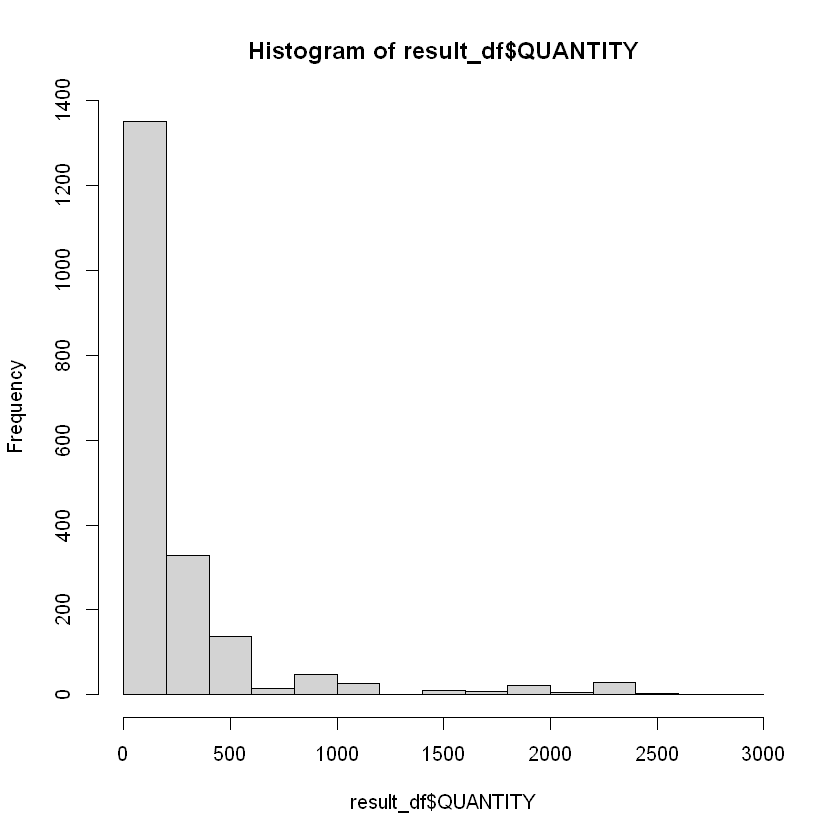

In [7]:
# Lets inspect the QUANTITY column
hist(x = result_df$QUANTITY)

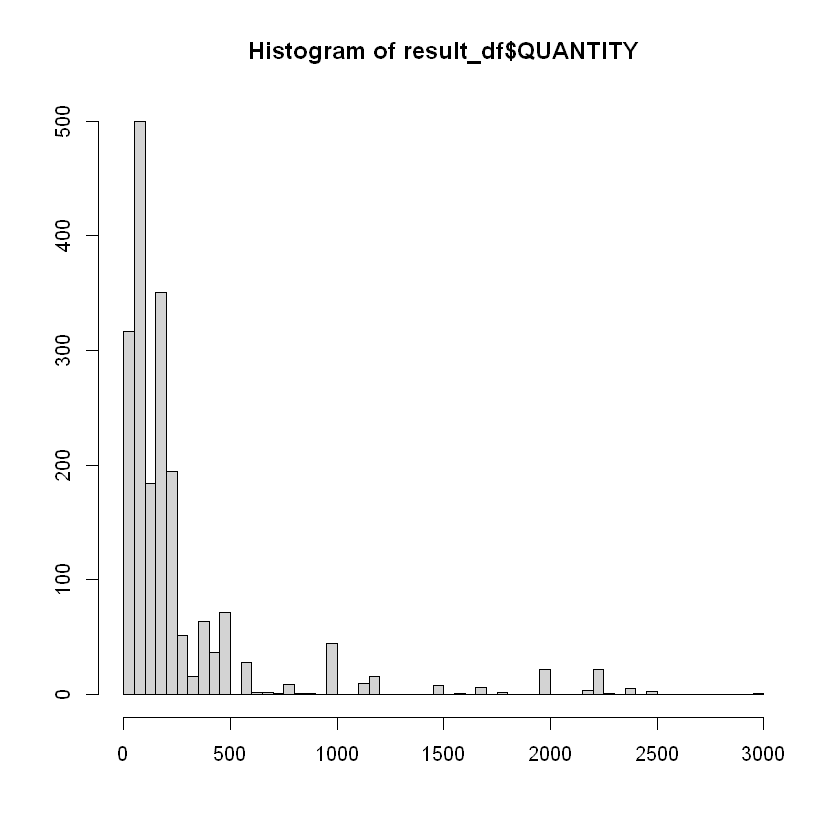

In [8]:
# Use more bins
hist(
    x = result_df$QUANTITY, 
    xlab = NULL, 
    ylab = NULL,
    breaks = 50
)

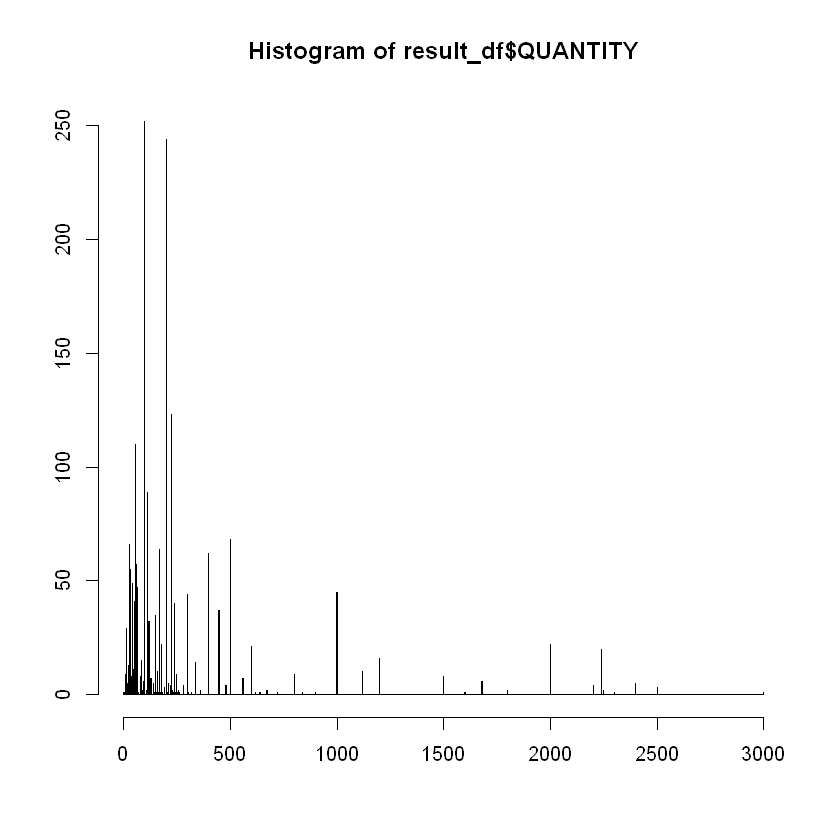

In [9]:
# One bin per value of QUANTITY
max_quantity <- max(result_df$QUANTITY)
hist(
    x = result_df$QUANTITY, 
    xlab = NULL, 
    ylab = NULL,
    breaks = max_quantity
)

Now we can use the `ggplot2` package to make more complex visualisations

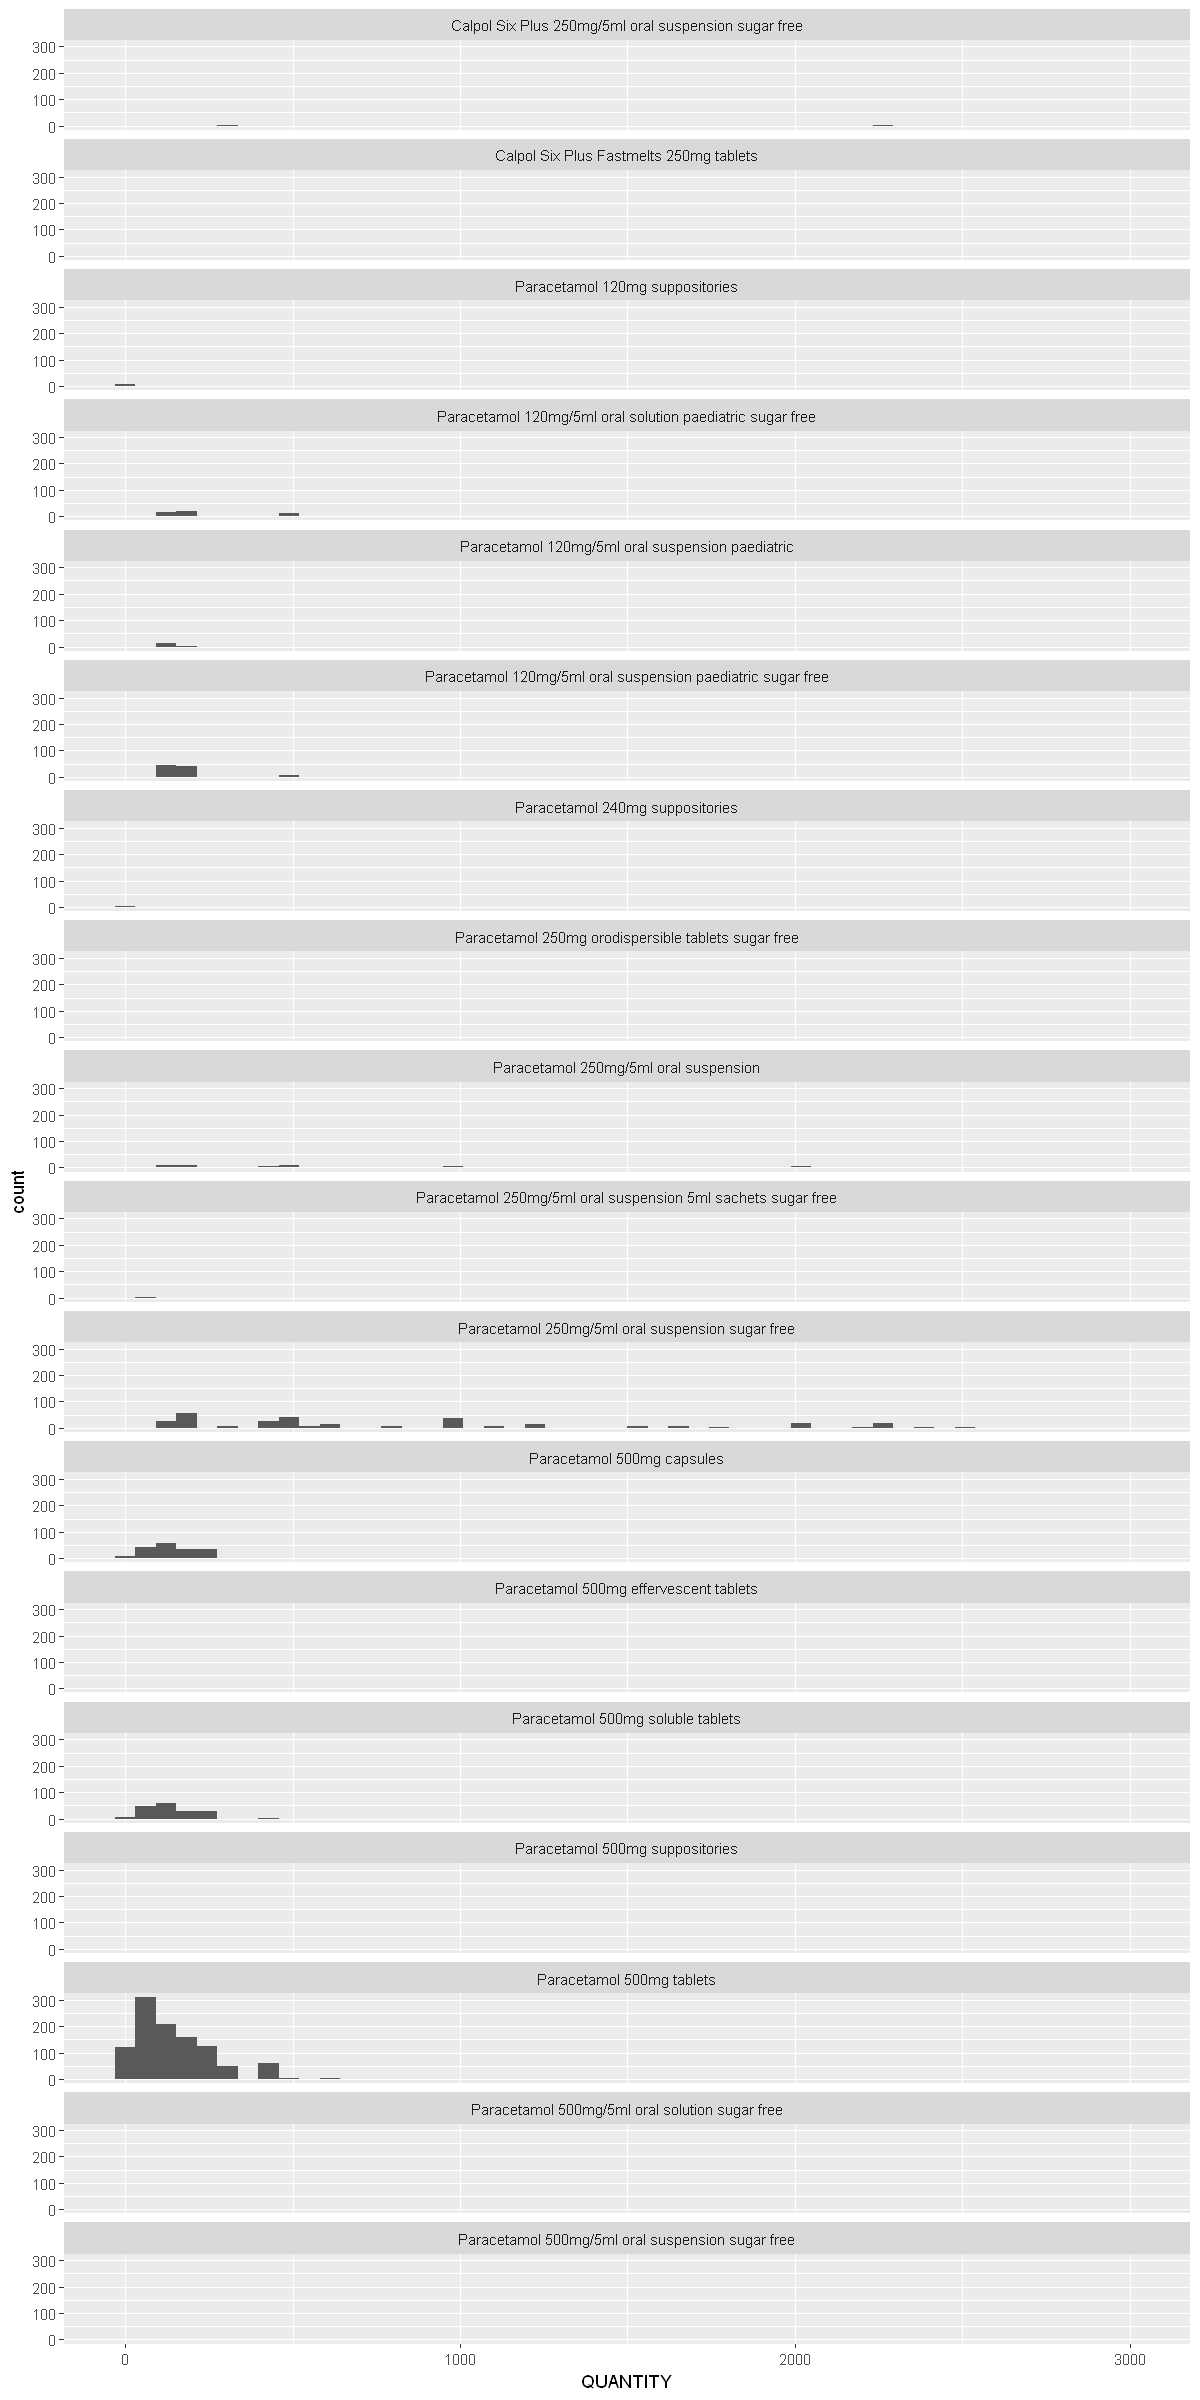

In [10]:
# Make the figure big enough for the plot
options(repr.plot.width = 10, repr.plot.height = 20)

# Lets see if QUANTITY varies by BNF_DESCRIPTION
ggplot2::ggplot(data = result_df, mapping = ggplot2::aes(x = QUANTITY)) +
    ggplot2::geom_histogram(bins = 50) +
    ggplot2::facet_wrap(facets = . ~ BNF_DESCRIPTION, ncol = 1) # One row per BNF_DESCRIPTION

# Reset to default figure
options(repr.plot.width = NULL, repr.plot.height = NULL)

We can see that `BNF_DESCRIPTION` contains different forms for the drugs, and that the `QUANTITY` differs (look at `BNF_DESCRIPTION == 'Paracetamol 250mg/5ml oral suspension sugar free'`)

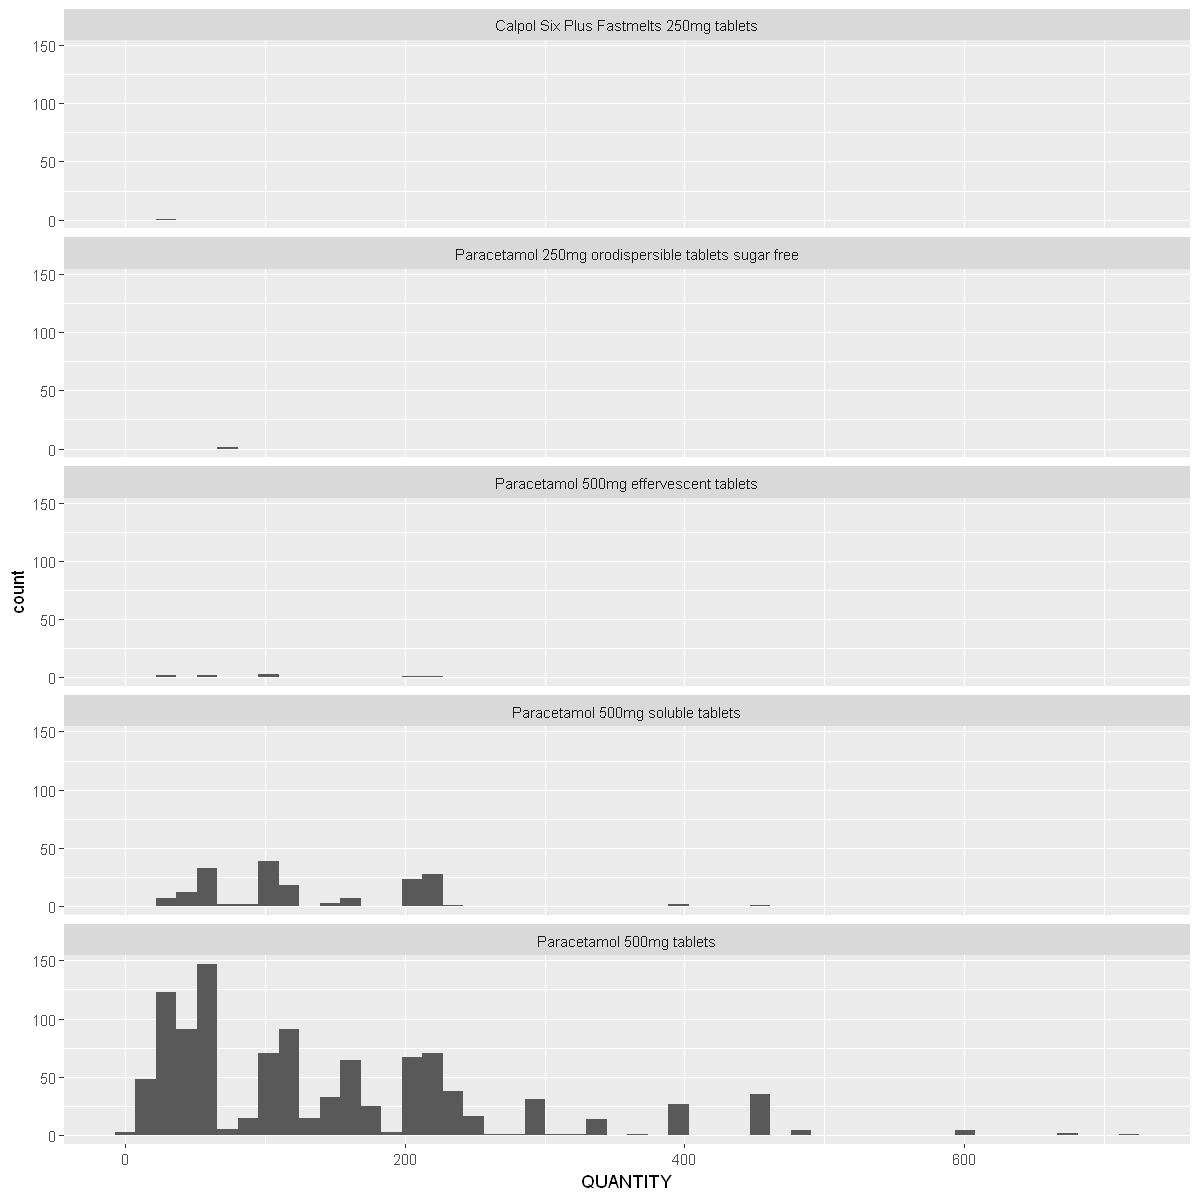

In [11]:
# Subset the data to tablets
tablet_df <- subset(result_df, grepl("tablet", BNF_DESCRIPTION))

# Make the figure big enough for the plot
options(repr.plot.width = 10, repr.plot.height = 10)

# Lets see if QUANTITY varies by BNF_DESCRIPTION
ggplot2::ggplot(data = tablet_df, mapping = ggplot2::aes(x = QUANTITY)) +
    ggplot2::geom_histogram(bins = 50) +
    ggplot2::facet_wrap(facets = . ~ BNF_DESCRIPTION, ncol = 1) # One row per BNF_DESCRIPTION

# Reset to default figure
options(repr.plot.width = NULL, repr.plot.height = NULL)

In [12]:
# We can see there are peaks for certain QUANTITY so lets examine the 10 most 
# common QUANITTY
head(sort(x = table(tablet_df$QUANTITY), decreasing = TRUE), 10)


100 224 200  56 112  28 168  60  32  64 
106  90  85  77  73  59  59  57  50  47 

TASK

Create another subset called `oral_suspension_df` (containing only 'oral suspension' instead of 'tablet') and then for `QUANTITY`:

1) Produce an overall histogram
2) Produce one histogram per `BNF_DESCRITPION`
3) Get the top 5 most common `QUANTITY`

In [13]:
# Do your work in here
